In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize


In [155]:
n = 50
n_steps = 15
radii = torch.tensor([1.] * n, requires_grad=True)
radii[0] = 2.
dtheta = 2. * np.pi / n
thetas = torch.arange(0,2*np.pi, dtheta)
dt = 0.1
torque = 1.
mass = 1.

print(thetas)
dtheta

tensor([0.0000, 0.1257, 0.2513, 0.3770, 0.5027, 0.6283, 0.7540, 0.8796, 1.0053,
        1.1310, 1.2566, 1.3823, 1.5080, 1.6336, 1.7593, 1.8850, 2.0106, 2.1363,
        2.2619, 2.3876, 2.5133, 2.6389, 2.7646, 2.8903, 3.0159, 3.1416, 3.2673,
        3.3929, 3.5186, 3.6442, 3.7699, 3.8956, 4.0212, 4.1469, 4.2726, 4.3982,
        4.5239, 4.6496, 4.7752, 4.9009, 5.0265, 5.1522, 5.2779, 5.4035, 5.5292,
        5.6549, 5.7805, 5.9062, 6.0319, 6.1575])


0.12566370614359174

In [126]:
def update_rs():
    edge_positions = calculate_edge_positions(radii)
    speeds = torch.zeros(n_steps)


    for i in range(1,n_steps):
        pivot_index = torch.argmin(edge_positions[:,1])
        pivot_radius = radii[pivot_index]
        force = torque / pivot_radius
        speeds[i] = speeds[i-1] + (force * dt / mass)
        rotational_speed = speed / pivot_radius
        
        edge_positions = rotate_edge_positions(edge_positions, pivot_index, rotational_speed * dt)
        draw_wheel(edge_positions)

In [137]:
def draw_wheel(edge_positions):
    xs, ys = edge_positions.transpose(0,1).detach().numpy()

    #plt.figure()
    plt.scatter(xs, ys)
    

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


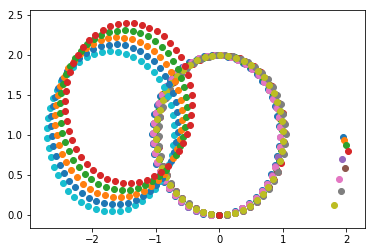

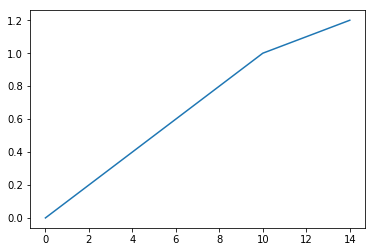

In [156]:
edge_positions = calculate_edge_positions(radii)
speeds = torch.zeros(n_steps)


for i in range(1,n_steps):
    pivot_index = torch.argmin(edge_positions[:,1])
    pivot_radius = radii[pivot_index]
    force = torque / pivot_radius
    speeds[i] = speeds[i-1] + (force * dt / mass)
    rotational_speed = speeds[i] / pivot_radius

    edge_positions = rotate_edge_positions(edge_positions, pivot_index, rotational_speed * dt)
    draw_wheel(edge_positions)
    
plt.figure()
plt.plot(speeds.detach())

In [62]:
def get_rot_matrix(theta):
    return torch.tensor([[torch.cos(theta), torch.sin(theta)],[-torch.sin(theta), torch.cos(theta)]])

In [128]:
def calculate_edge_positions(radii):
    return radii.unsqueeze(1) * torch.cat((torch.cos(thetas.reshape((-1,1))),torch.sin(thetas.reshape((-1,1)))), 1)

In [139]:
def rotate_edge_positions(edge_positions, pivot_index, theta):
    rot_matrix = get_rot_matrix(theta)
    edge_positions = torch.matmul(rot_matrix, edge_positions.transpose(0,1)).transpose(0,1)
    
    pivot_index = torch.argmin(edge_positions[:,1])
    edge_positions -= torch.tensor(edge_positions[pivot_index])
    return edge_positions